In [1]:
#importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Importing the Dataset

df = pd.read_csv("Case 1 - Airbnb Dataset.csv")
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday,city
0,121.122322,Private room,False,True,2.0,False,0,0,6.0,69.0,...,5.734117,0.437094,222.882243,15.493414,470.088502,8.413765,-0.04975,51.52570,0,london
1,195.912416,Private room,False,True,2.0,False,1,0,10.0,96.0,...,4.788905,1.464050,235.385841,16.362588,530.133525,9.488466,-0.08475,51.54210,0,london
2,193.325337,Private room,False,True,3.0,False,1,0,10.0,95.0,...,4.596677,0.450306,268.913812,18.693247,548.987610,9.825922,-0.14585,51.54802,0,london
3,180.389943,Private room,False,True,2.0,False,1,0,9.0,87.0,...,2.054769,0.132670,472.381314,32.837067,1021.271062,18.278973,-0.10611,51.52108,0,london
4,405.700981,Entire home/apt,False,False,3.0,False,0,1,7.0,65.0,...,4.491277,0.354108,318.491470,22.139584,692.775411,12.399473,-0.18797,51.49399,0,london


### Exploratory Data Analysis

#### 1) Check basic data information and cleaning if needed

In [3]:
#Getting basic info on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [4]:
#Getting basic descriptive stats on numerical columns

df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekday
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


In [5]:
#Confirming that there is no missing values

df.isna().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
weekday                       0
city                          0
dtype: int64

In [6]:
#Checking for duplicates

df.duplicated().sum()

0

#### 2) Exploring the relationship between the features

##### 2.1) Numerical

In [7]:
df = df.drop(['attr_index', 'rest_index'], axis=1)

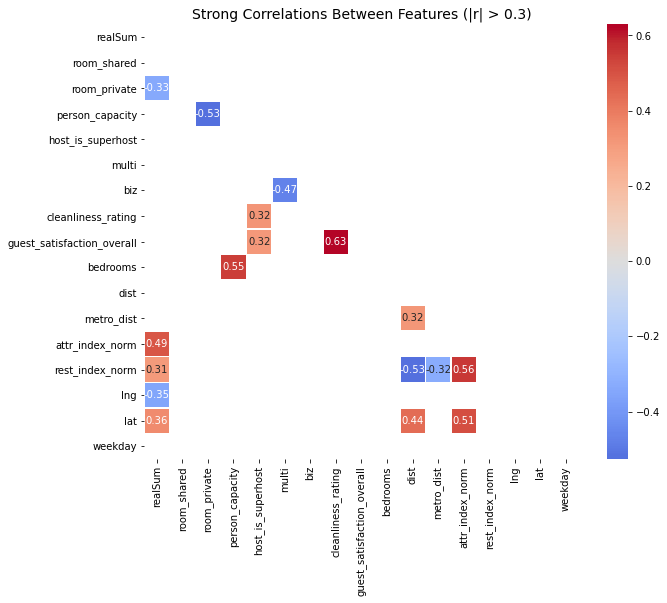

In [8]:
corr_matrix = df.corr(method='spearman')

# Mask values where abs(correlation) <= 0.3
mask = (abs(corr_matrix) <= 0.3)
mask_upper = np.triu(np.ones_like(corr_matrix, dtype=bool))
combined_mask = mask_upper | mask

filtered_corr = corr_matrix.mask(combined_mask)


# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, linewidths=0.5, cbar=True, square=True)

plt.title("Strong Correlations Between Features (|r| > 0.3)", fontsize=14)
plt.show()

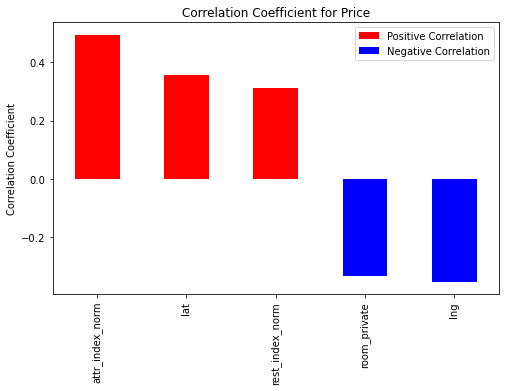

In [9]:
target = 'realSum'
correlations = df.corr("spearman")[target].drop([target]).sort_values(ascending=False)

correlations = correlations[abs(correlations) > 0.3].sort_values(ascending=False)
colors = ['red' if val > 0.3 else 'blue' for val in correlations]

correlations.plot(kind='bar', color=colors,  figsize=(8, 5), title='Correlation Coefficient for Price')
plt.ylabel('Correlation Coefficient')
legend_elements = [
    Patch(facecolor='red', label='Positive Correlation'),
    Patch(facecolor='blue', label='Negative Correlation')
]
plt.legend(handles=legend_elements)
plt.show()

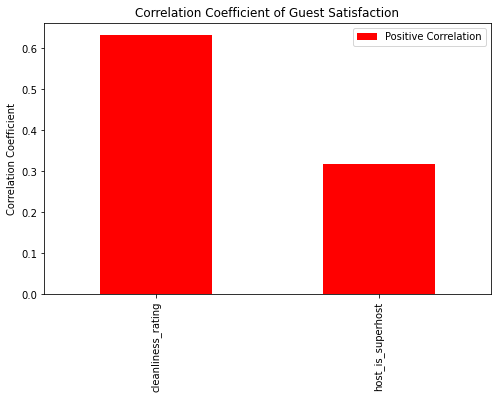

In [10]:
target = 'guest_satisfaction_overall'
correlations = df.corr("spearman")[target].drop([target]).sort_values(ascending=False)

correlations = correlations[abs(correlations) > 0.3].sort_values(ascending=False)
colors = ['red' if val > 0.3 else 'blue' for val in correlations]

correlations.plot(kind='bar', color=colors,  figsize=(8, 5), title='Correlation Coefficient of Guest Satisfaction')
plt.ylabel('Correlation Coefficient')
plt.legend(["Positive Correlation", "Negative Correlation"])
plt.show()

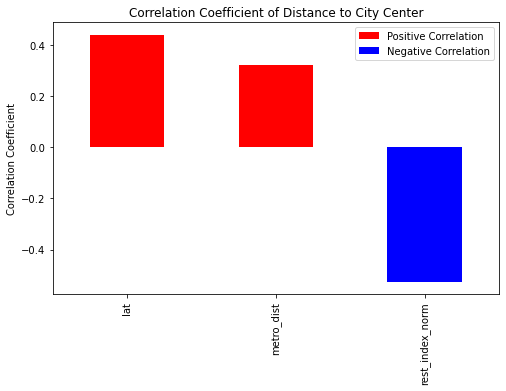

In [11]:
target = 'dist'
correlations = df.corr("spearman")[target].drop([target]).sort_values(ascending=False)

correlations = correlations[abs(correlations) > 0.3].sort_values(ascending=False)
colors = ['red' if val > 0.3 else 'blue' for val in correlations]

correlations.plot(kind='bar', color=colors,  figsize=(8, 5), title='Correlation Coefficient of Distance to City Center')
plt.ylabel('Correlation Coefficient')
legend_elements = [
    Patch(facecolor='red', label='Positive Correlation'),
    Patch(facecolor='blue', label='Negative Correlation')
]
plt.legend(handles=legend_elements)
plt.show()

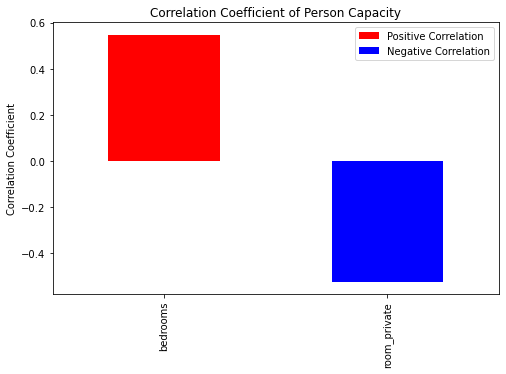

In [12]:
target = 'person_capacity'
correlations = df.corr("spearman")[target].drop([target]).sort_values(ascending=False)

correlations = correlations[abs(correlations) > 0.3].sort_values(ascending=False)
colors = ['red' if val > 0.3 else 'blue' for val in correlations]

correlations.plot(kind='bar', color=colors,  figsize=(8, 5), title='Correlation Coefficient of Person Capacity')
plt.ylabel('Correlation Coefficient')
legend_elements = [
    Patch(facecolor='red', label='Positive Correlation'),
    Patch(facecolor='blue', label='Negative Correlation')
]
plt.legend(handles=legend_elements)
plt.show()

##### 2.1) Categorical

In [13]:
#Analyzing the effect of room_type
listing_count = df.groupby('room_type').size().rename('count')

room_type_stats = df.groupby("room_type").agg({
    'realSum': ['mean', 'median'],
    'bedrooms': 'mean',
    'guest_satisfaction_overall': 'mean',
    'person_capacity': 'mean',
    'cleanliness_rating': 'mean'
})

room_type_stats.columns = ['_'.join(col).strip() for col in room_type_stats.columns.values]
room_type_stats = room_type_stats.rename(columns={
    'realSum_mean': 'avg_price',
    'realSum_median': 'median_price',
    "bedrooms_mean": "avg_num_bedrooms",
    'guest_satisfaction_overall_mean': 'avg_satisfaction',
    'person_capacity_mean': 'avg_person_capacity',
    'cleanliness_rating_mean': "avg_cleanliness_rating"
})

room_type_stats = room_type_stats.join(listing_count)

room_type_stats

,avg_price,median_price,avg_num_bedrooms,avg_satisfaction,avg_person_capacity,avg_cleanliness_rating,count
room_type,,,,,,,
Entire home/apt,324.315150,248.456736,1.234961,92.888691,3.649626,9.418219,32648
Private room,204.940233,166.371516,1.028781,92.231156,2.298828,9.351308,18693
Shared room,143.566164,124.479283,1.000000,89.674863,3.702186,8.937158,366


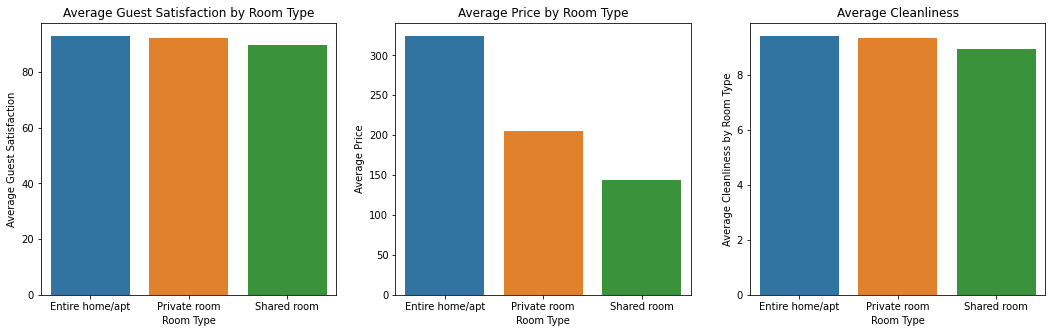

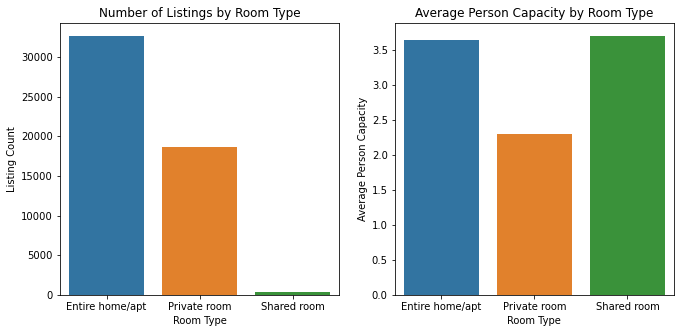

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.barplot(x=room_type_stats.index, y=room_type_stats["avg_satisfaction"], ax=axes[0])
axes[0].set_title("Average Guest Satisfaction by Room Type")
axes[0].set_xlabel('Room Type')
axes[0].set_ylabel('Average Guest Satisfaction')


sns.barplot(x=room_type_stats.index, y=room_type_stats["avg_price"], ax=axes[1])
axes[1].set_ylabel('Average Price')
axes[1].set_xlabel('Room Type')
axes[1].set_title('Average Price by Room Type')


sns.barplot(x=room_type_stats.index, y=room_type_stats["avg_cleanliness_rating"], ax=axes[2])
axes[2].set_ylabel('Average Cleanliness by Room Type')
axes[2].set_xlabel('Room Type')
axes[2].set_title('Average Cleanliness')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(11, 5))

sns.barplot(x=room_type_stats.index, y=room_type_stats["count"], ax=axes[0])
axes[0].set_ylabel('Listing Count')
axes[0].set_xlabel('Room Type')
axes[0].set_title('Number of Listings by Room Type')

sns.barplot(x=room_type_stats.index, y=room_type_stats["avg_person_capacity"], ax=axes[1])
axes[1].set_ylabel('Average Person Capacity')
axes[1].set_xlabel('Room Type')
axes[1].set_title('Average Person Capacity by Room Type')

plt.show()

In [15]:
#Analyzing the impact of superhost status
listing_count_superhost = df.groupby('host_is_superhost').size().rename('count')

superhost_stats = df.groupby("host_is_superhost").agg({
    'realSum': ['mean', 'median'],
    'guest_satisfaction_overall': 'mean',
    'cleanliness_rating': 'mean'
})

superhost_stats.columns = ['_'.join(col).strip() for col in superhost_stats.columns.values]
superhost_stats = superhost_stats.rename(columns={
    'realSum_mean': 'avg_price',
    'realSum_median': 'median_price',
    'guest_satisfaction_overall_mean': 'avg_satisfaction',
    'cleanliness_rating_mean': "avg_cleanliness_rating"
})

superhost_stats = superhost_stats.join(listing_count_superhost)

superhost_stats.index=["No", "Yes"]

superhost_stats

,avg_price,median_price,avg_satisfaction,avg_cleanliness_rating,count
No,288.625905,217.549801,91.159038,9.238103,38475
Yes,254.447726,197.040881,96.900242,9.834114,13232


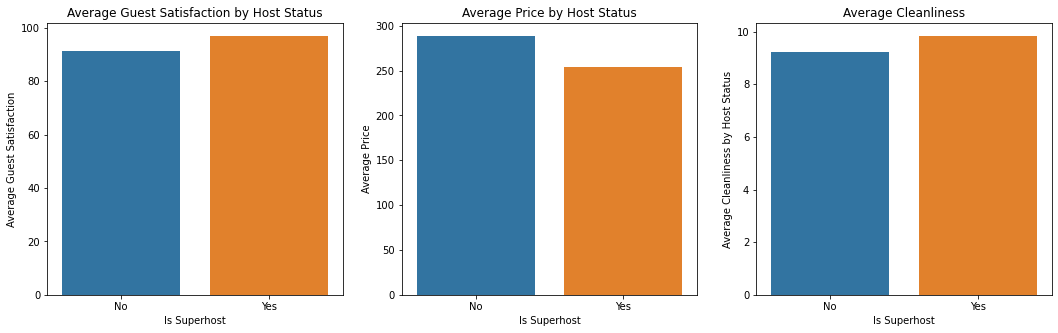

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.barplot(x=superhost_stats.index, y=superhost_stats["avg_satisfaction"], ax=axes[0])
axes[0].set_title("Average Guest Satisfaction by Host Status")
axes[0].set_xlabel('Is Superhost')
axes[0].set_ylabel('Average Guest Satisfaction')


sns.barplot(x=superhost_stats.index, y=superhost_stats["avg_price"], ax=axes[1])
axes[1].set_ylabel('Average Price')
axes[1].set_xlabel('Is Superhost')
axes[1].set_title('Average Price by Host Status')


sns.barplot(x=superhost_stats.index, y=superhost_stats["avg_cleanliness_rating"], ax=axes[2])
axes[2].set_ylabel('Average Cleanliness by Host Status')
axes[2].set_xlabel('Is Superhost')
axes[2].set_title('Average Cleanliness')

plt.show()

In [17]:
#Analyzing impact of city
listing_count_city = df.groupby('city').size().rename('count')

biz_count_city = df.groupby('city')['biz'].apply(lambda x: (x == 1).sum()).rename('biz_count')
#multi_count_city = df.groupby('city')['multi'].apply(lambda x: (x == 1).sum()).rename('multi_count')

city_stats = df.groupby("city").agg({
    'realSum': ['mean', 'median'],
    'guest_satisfaction_overall': 'mean',
})

city_stats.columns = ['_'.join(col).strip() for col in city_stats.columns.values]
city_stats = city_stats.rename(columns={
    'realSum_mean': 'avg_price',
    'realSum_median': 'median_price',
    'guest_satisfaction_overall_mean': 'avg_satisfaction',
})

city_stats = city_stats.join(listing_count_city)
city_stats = city_stats.join(biz_count_city)
#city_stats = city_stats.join(multi_count_city)

city_stats = city_stats.sort_values("avg_price", ascending=False)
city_stats

,avg_price,median_price,avg_satisfaction,count,biz_count
city,,,,,
amsterdam,573.112795,460.244183,94.514423,2080,219
paris,392.531403,317.597167,92.037530,6688,1644
london,362.469256,261.294950,90.645652,9993,3876
barcelona,293.753706,208.299393,91.109072,2833,922
berlin,244.583752,191.175096,94.323671,2484,434
vienna,241.582484,208.494028,93.731128,3537,1202
lisbon,238.210479,225.375235,91.093875,5763,3386
rome,205.391950,182.591822,93.122300,9027,3016
budapest,176.513548,152.982093,94.585281,4022,1403


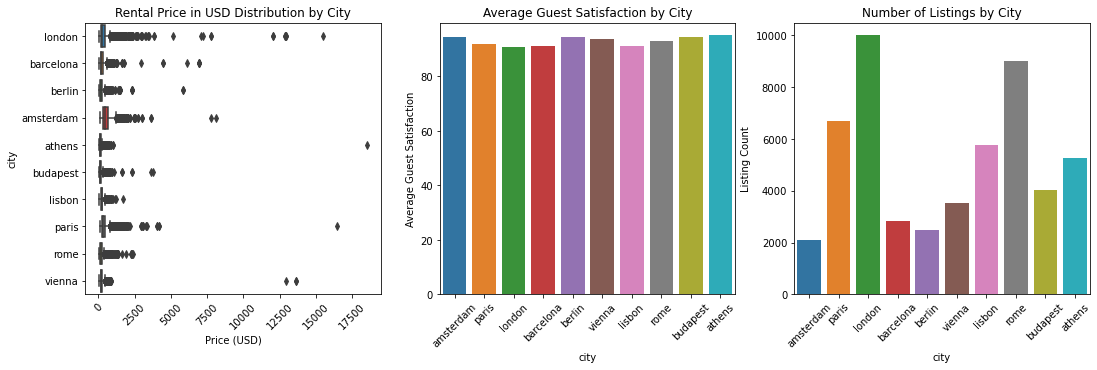

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.boxplot(data=df, x='realSum', y='city', ax=axes[0])
axes[0].set_title("Rental Price in USD Distribution by City")
axes[0].set_xlabel('Price (USD)')
axes[0].tick_params(axis="x", labelrotation=45) 


sns.barplot(x=city_stats.index, y=city_stats["avg_satisfaction"], ax=axes[1])
axes[1].set_ylabel('Average Guest Satisfaction')
axes[1].set_title('Average Guest Satisfaction by City')
axes[1].tick_params(axis="x", labelrotation=45) 


sns.barplot(x=city_stats.index, y=city_stats["count"], ax=axes[2])
axes[2].set_ylabel('Listing Count')
axes[2].set_title('Number of Listings by City')
axes[2].tick_params(axis="x", labelrotation=45) 

plt.show()

Text(0.5, 1.0, 'Price vs Distance to the city center')

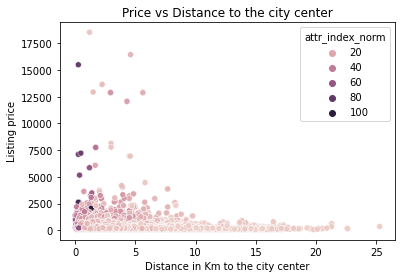

In [19]:
sns.scatterplot(data=df, x='dist', y='realSum', hue='attr_index_norm')
plt.xlabel("Distance in Km to the city center")
plt.ylabel("Listing price")
plt.title("Price vs Distance to the city center")

#### 3) Modeling & Prediction

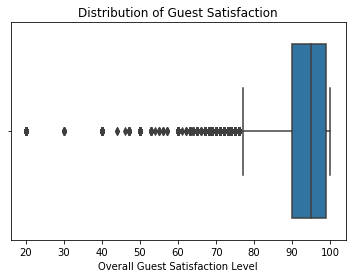

In [20]:
#plotting the distribution of the guest satisfaction


#boxplot
sns.boxplot(x=df['guest_satisfaction_overall'])
plt.title('Distribution of Guest Satisfaction')
plt.xlabel('Overall Guest Satisfaction Level')


plt.show()

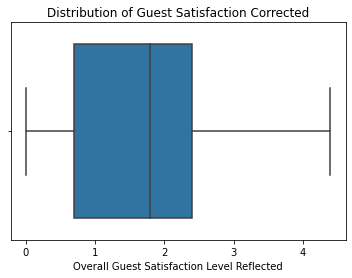

In [21]:
# Reflect to make it right-skewed
reflected = max(df['guest_satisfaction_overall']) + 1 - df['guest_satisfaction_overall']
df['guest_satisfaction_overall_reflected'] = np.log(reflected)


#boxplot
sns.boxplot(x=df['guest_satisfaction_overall_reflected'])
plt.title('Distribution of Guest Satisfaction Corrected')
plt.xlabel('Overall Guest Satisfaction Level Reflected')


plt.show()

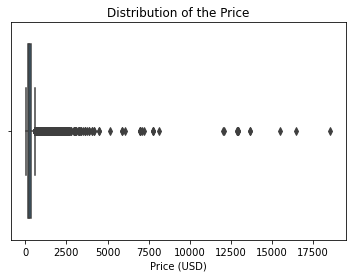

In [22]:
#Ploting the distribution of the price


#boxplot
sns.boxplot(x=df['realSum'])
plt.title('Distribution of the Price')
plt.xlabel('Price (USD)')


plt.show()

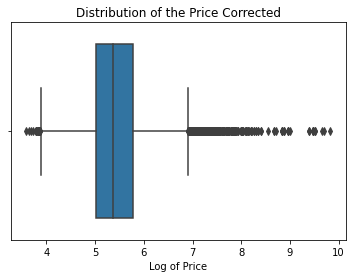

In [23]:
#Ploting the distribution of the log price

#boxplot
sns.boxplot(x=np.log1p(df['realSum']))
plt.title('Distribution of the Price Corrected')
plt.xlabel('Log of Price')

plt.show()

In [24]:
#convert bool features to int to make handling easier

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [25]:
#Adding a column for whether the listing is and entire apartment or home

df.loc[df["room_type"]=="Entire home/apt", "entire_home_apt"] = 1
df.loc[df["room_type"]!="Entire home/apt", "entire_home_apt"] = 0
df["entire_home_apt"] = df["entire_home_apt"].astype(int)

In [26]:
#Adding new features
df['dist_to_attr_ratio'] = df['dist'] / (df['attr_index_norm'] + 1e-5)

#Encoding categorical variables city
one_hot = pd.get_dummies(df['city'])
df_encoded = df.drop('city',axis = 1)
df_encoded = df_encoded.join(one_hot)

##### 3.1) Dynamic Pricing by city:

In [27]:
X = df_encoded.drop(columns=['realSum', "room_type",'guest_satisfaction_overall_reflected'])
y = np.log1p(df_encoded['realSum'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

# Predict
y_pred_log_rf = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)  # Reverse the log transformation
y_true = np.expm1(y_test)

# Evaluation
mae_rf = mean_absolute_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_true, y_pred_rf))
r2_rf = r2_score(y_true, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.3f}")

MAE: 53.90
RMSE: 280.50
R² Score: 0.355


Text(0.5, 1.0, 'Feature Importance for Listing Price')

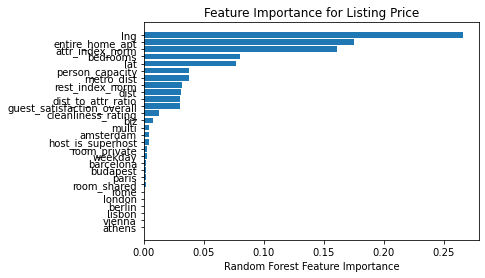

In [28]:
sorted_idx_rf = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx_rf], rf_model.feature_importances_[sorted_idx_rf])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Listing Price")

In [29]:
#Building city specific models for example London
city = "london"
X_lnd = df.loc[df["city"]==city].drop(columns=['realSum', "room_type","city",'guest_satisfaction_overall_reflected'])
y_lnd = np.log1p(df.loc[df["city"]==city]['realSum'])

X_train_lnd, X_test_lnd, y_train_lnd, y_test_lnd = train_test_split(X_lnd, y_lnd, test_size=0.25, random_state=12)

rf_model_lnd = RandomForestRegressor(random_state=42)

rf_model_lnd.fit(X_train_lnd, y_train_lnd)

# Predict
y_pred_log_rf_lnd = rf_model_lnd.predict(X_test_lnd)
y_pred_rf_lnd = np.expm1(y_pred_log_rf_lnd)  # Reverse the log transformation
y_true_lnd = np.expm1(y_test_lnd)

# Evaluation
mae_rf_lnd = mean_absolute_error(y_true_lnd, y_pred_rf_lnd)
rmse_rf_lnd = np.sqrt(mean_squared_error(y_true_lnd, y_pred_rf_lnd))
r2_rf_lnd = r2_score(y_true_lnd, y_pred_rf_lnd)

print(f"MAE: {mae_rf_lnd:.2f}")
print(f"RMSE: {rmse_rf_lnd:.2f}")
print(f"R² Score: {r2_rf_lnd:.3f}")

MAE: 69.10
RMSE: 282.34
R² Score: 0.621


Text(0.5, 1.0, 'Feature Importance for Listing Price in London')

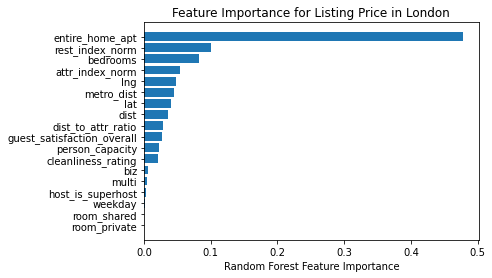

In [30]:
sorted_idx_rf_lnd = rf_model_lnd.feature_importances_.argsort()
plt.barh(X_lnd.columns[sorted_idx_rf_lnd], rf_model_lnd.feature_importances_[sorted_idx_rf_lnd])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Listing Price in London")

In [31]:
#Building city specific models for example Athens
city = "athens"
X_ath = df.loc[df["city"]==city].drop(columns=['realSum', "room_type","city",'guest_satisfaction_overall_reflected'])
y_ath = np.log1p(df.loc[df["city"]==city]['realSum'])

X_train_ath, X_test_ath, y_train_ath, y_test_ath = train_test_split(X_ath, y_ath, test_size=0.25, random_state=12)

rf_model_ath = RandomForestRegressor(random_state=42)

rf_model_ath.fit(X_train_ath, y_train_ath)

# Predict
y_pred_log_rf_ath = rf_model_ath.predict(X_test_ath)
y_pred_rf_ath = np.expm1(y_pred_log_rf_ath)  # Reverse the log transformation
y_true_ath = np.expm1(y_test_ath)

# Evaluation
mae_rf_ath = mean_absolute_error(y_true_ath, y_pred_rf_ath)
rmse_rf_ath = np.sqrt(mean_squared_error(y_true_ath, y_pred_rf_ath))
r2_rf_ath = r2_score(y_true_ath, y_pred_rf_ath)

print(f"MAE: {mae_rf_ath:.2f}")
print(f"RMSE: {rmse_rf_ath:.2f}")
print(f"R² Score: {r2_rf_ath:.3f}")

MAE: 27.01
RMSE: 48.40
R² Score: 0.682


Text(0.5, 1.0, 'Feature Importance for Listing Price in Athens')

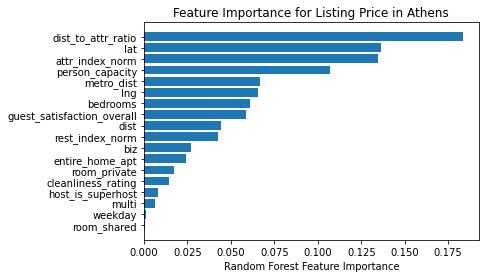

In [32]:
sorted_idx_rf_ath = rf_model_ath.feature_importances_.argsort()
plt.barh(X_ath.columns[sorted_idx_rf_ath], rf_model_ath.feature_importances_[sorted_idx_rf_ath])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Listing Price in Athens")

##### 3.2) Guest Satisfaction Prediction

In [33]:
X = df_encoded.drop(columns=['guest_satisfaction_overall_reflected', "guest_satisfaction_overall", "room_type"])
y = df_encoded['guest_satisfaction_overall_reflected']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

# Predict
y_pred_log_rf = rf_model.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)  # Reverse the log transformation
y_true = np.expm1(y_test)

# Evaluation
mae_rf = mean_absolute_error(y_true, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_true, y_pred_rf))
r2_rf = r2_score(y_true, y_pred_rf)

print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.3f}")

MAE: 2.88
RMSE: 5.17
R² Score: 0.658


Text(0.5, 1.0, 'Feature Importance for Guest Overall Satisfaction')

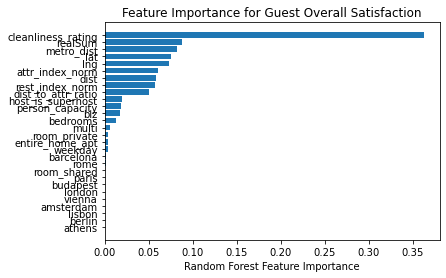

In [34]:
sorted_idx_rf = rf_model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx_rf], rf_model.feature_importances_[sorted_idx_rf])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Guest Overall Satisfaction")